In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_text
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
medal_by_country = pd.read_csv('data/medal_by_country_coor.csv')
medal_by_country

,country,gold,silver,bronze,total,longitude,latitude,class
0,FR Germany,289,218,198,1501,10.451526,51.165691,1
1,Sweden,190,205,143,1123,18.643501,60.128161,1
2,Belgium,79,73,70,453,4.469936,50.503887,1
3,Great Britain,439,502,483,2804,-3.435973,55.378051,1
4,Netherlands,189,239,237,1282,5.291266,52.132633,1
...,...,...,...,...,...,...,...,...
110,Syria,0,0,1,1,38.996815,34.802075,4
111,Kazakhstan,1,1,0,5,66.923684,48.019573,4
112,Faroe Islands,1,7,5,22,-6.911806,61.892635,4
113,Peru,2,1,2,10,-75.015152,-9.189967,4


In [3]:
y_gold = []
y_silver = []
y_bronze = []
for gold,silver,bronze in zip(medal_by_country["gold"],medal_by_country["silver"],medal_by_country["bronze"]):
    if gold > 0:
        y_gold.append(1)
    else:
        y_gold.append(0)
    if silver > 0:
        y_silver.append(1)
    else:
        y_silver.append(0)
    if bronze > 0:
        y_bronze.append(1)
    else:
        y_bronze.append(0)

In [4]:
data_changed = pd.DataFrame()
data_changed["class"] = medal_by_country["class"]
data_changed["gold"] = medal_by_country["gold"]
data_changed["silver"] = medal_by_country["silver"]
data_changed["bronze"] = medal_by_country["bronze"]
data_changed

,class,gold,silver,bronze
0,1,289,218,198
1,1,190,205,143
2,1,79,73,70
3,1,439,502,483
4,1,189,239,237
...,...,...,...,...
110,4,0,0,1
111,4,1,1,0
112,4,1,7,5
113,4,2,1,2


In [5]:
data_changed = data_changed.astype({"class": str}, errors='raise') 
data_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   115 non-null    object
 1   gold    115 non-null    int64 
 2   silver  115 non-null    int64 
 3   bronze  115 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.7+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

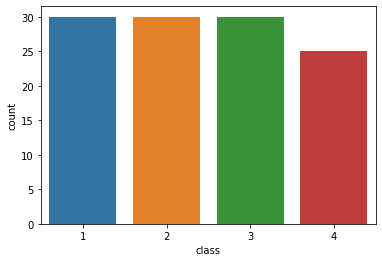

In [6]:
sns.countplot(data_changed['class'])

In [7]:
#sns.countplot(data_changed['gold'],hue=data_changed['class'])

In [8]:
#sns.countplot(data_changed['silver'],hue=data_changed['class'])

In [9]:
X = data_changed.drop('class',axis=1)
y = data_changed[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [10]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [11]:
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.5428571428571428

In [12]:
target = list(data_changed['class'].unique())
feature_names = list(X.columns)

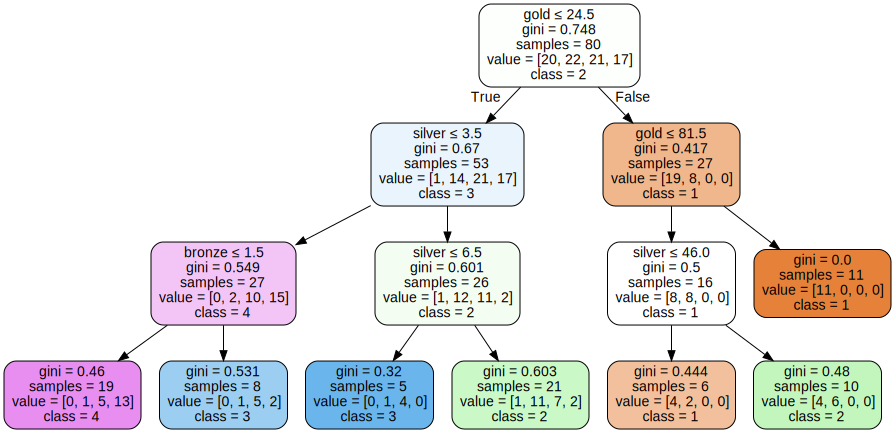

In [13]:
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names,  class_names=target,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [14]:
r = export_text(clf_model, feature_names=feature_names)
r

'|--- gold <= 24.50\n|   |--- silver <= 3.50\n|   |   |--- bronze <= 1.50\n|   |   |   |--- class: 4\n|   |   |--- bronze >  1.50\n|   |   |   |--- class: 3\n|   |--- silver >  3.50\n|   |   |--- silver <= 6.50\n|   |   |   |--- class: 3\n|   |   |--- silver >  6.50\n|   |   |   |--- class: 2\n|--- gold >  24.50\n|   |--- gold <= 81.50\n|   |   |--- silver <= 46.00\n|   |   |   |--- class: 1\n|   |   |--- silver >  46.00\n|   |   |   |--- class: 2\n|   |--- gold >  81.50\n|   |   |--- class: 1\n'

In [15]:
data_changed_1 = pd.DataFrame()
data_changed_1["class"] = medal_by_country["class"]
data_changed_1["gold"] = y_gold
data_changed_1["silver"] = y_silver
data_changed_1["bronze"] = y_bronze
data_changed_1 = data_changed_1.astype({"class": str}, errors='raise') 
data_changed_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   115 non-null    object
 1   gold    115 non-null    int64 
 2   silver  115 non-null    int64 
 3   bronze  115 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.7+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gold', ylabel='count'>

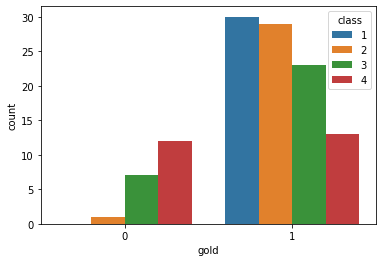

In [16]:
sns.countplot(data_changed_1['gold'],hue=data_changed_1['class'])

In [17]:
X = data_changed_1.drop('class',axis=1)
y = data_changed_1[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [18]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [19]:
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.2857142857142857

In [20]:
target = list(data_changed_1['class'].unique())
feature_names = list(X.columns)

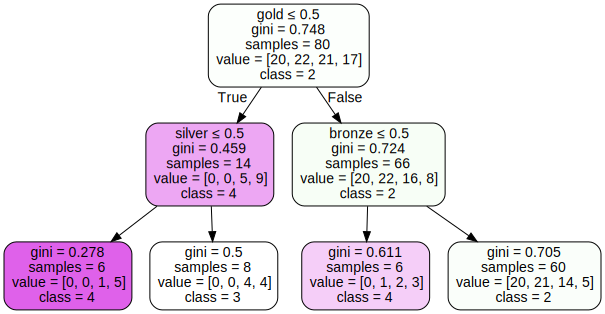

In [21]:
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names,  class_names=target,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [22]:
data_changed_2 = pd.DataFrame()
data_changed_2["class"] = medal_by_country["class"]
data_changed_2["gold"] = y_gold
data_changed_2["silver"] = y_silver
data_changed_2["bronze"] = y_bronze
data_changed_2["total"] = medal_by_country["total"]
data_changed_2 = data_changed_2.astype({"class": str}, errors='raise') 
data_changed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   115 non-null    object
 1   gold    115 non-null    int64 
 2   silver  115 non-null    int64 
 3   bronze  115 non-null    int64 
 4   total   115 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.6+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gold', ylabel='count'>

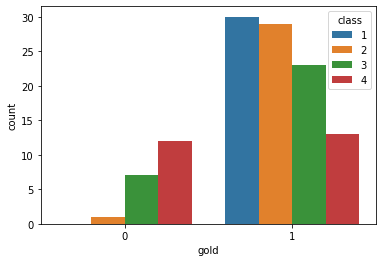

In [23]:
sns.countplot(data_changed_2['gold'],hue=data_changed_2['class'])

In [24]:
X = data_changed_2.drop('class',axis=1)
y = data_changed_2[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [25]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [26]:
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.6285714285714286

In [27]:
target = list(data_changed_2['class'].unique())
feature_names = list(X.columns)

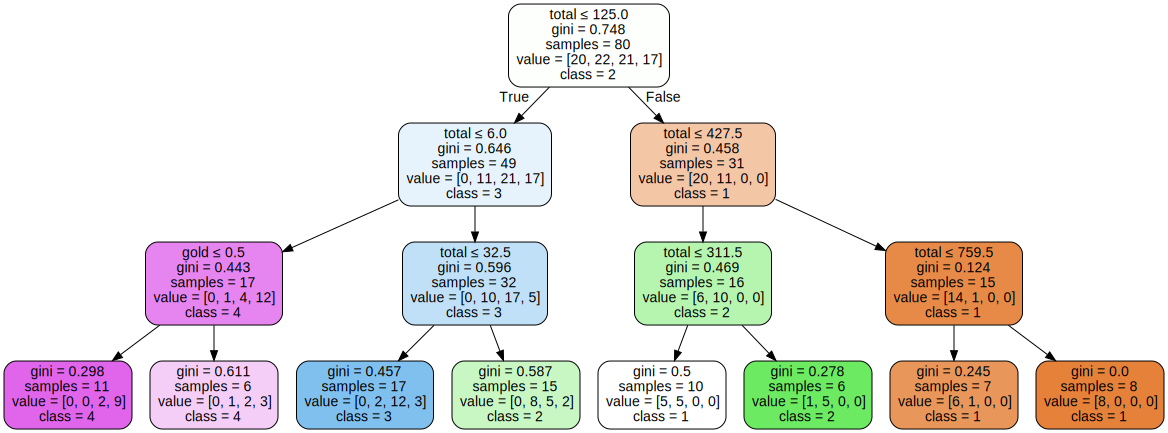

In [28]:
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names,  class_names=target,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph